# Emotion Detection

**Importing Libraries**

In [12]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.16.1


**Exploring Dataset**

ValueError: num must be 1 <= num <= 4, not 5

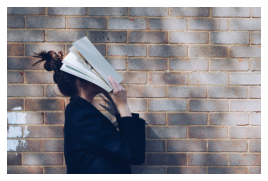

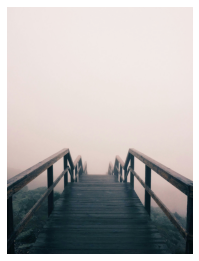

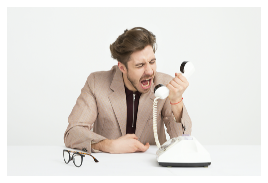

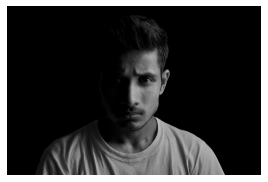

<Figure size 720x720 with 0 Axes>

In [13]:
images = glob("C://Users//Shweta//OneDrive//Desktop//Emotion_detection-main//train//**//**")
for i in range(7):
    image = random.choice(images)
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, i+1)
    plt.imshow(cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()

**Preparing Data for Training**

In [14]:
img_size = 48
batch_size = 64

datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory(
    "C:\\Users\\Shweta\\OneDrive\\Desktop\\Emotion_detection-main\\train\\",
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_validation.flow_from_directory(
    "C:\\Users\\Shweta\\OneDrive\\Desktop\\Emotion_detection-main\\test\\",
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

Found 49 images belonging to 7 classes.
Found 45 images belonging to 7 classes.


In [15]:
x, y = next(train_generator)
print(f"Train batch shape: {x.shape}, {y.shape}")

x_val, y_val = next(validation_generator)
print(f"Validation batch shape: {x_val.shape}, {y_val.shape}")

Train batch shape: (49, 48, 48, 1), (49, 7)
Validation batch shape: (45, 48, 48, 1), (45, 7)


**Defining Model**

In [16]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters=filters, kernel_size=kernel_size, padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    return x

In [17]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    return x

In [18]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs, 32, (3, 3))
    conv_2 = Convolution(conv_1, 64, (3, 3))
    conv_3 = Convolution(conv_2, 128, (3, 3))

    flatten = Flatten()(conv_3)
    dense_1 = Dense_f(flatten, 256)
    output = Dense(7, activation="softmax")(dense_1)
    
    model = Model(inputs=[inputs], outputs=[output])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
    
    return model

In [19]:
model = model_fer((48, 48, 1))
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,276,295 (4.87 MB)

 Trainable params: 1,275,335 (4.87 MB)

 Non-trainable params: 960 (3.75 KB)

**Initializing the Model**

In [20]:
epochs = 15
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

checkpoint = ModelCheckpoint("model.weights.h5", monitor='val_accuracy', save_weights_only=True, mode='max', verbose=1)
callbacks = [checkpoint]

# Traning the Model

**The next cell takes time to complete**

In [21]:
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks
)

Epoch 1/15


C:\Users\Shweta\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23s/step - accuracy: 0.1224 - loss: 2.5964
Epoch 1: saving model to model.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 62s 62s/step - accuracy: 0.1224 - loss: 2.5964 - val_accuracy: 0.2000 - val_loss: 7.5309
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21s/step - accuracy: 0.2653 - loss: 1.9724
Epoch 2: saving model to model.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 40s 40s/step - accuracy: 0.2653 - loss: 1.9724 - val_accuracy: 0.1778 - val_loss: 8.0388
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21s/step - accuracy: 0.5102 - loss: 1.3817
Epoch 3: saving model to model.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 40s 40s/step - accuracy: 0.5102 - loss: 1.3817 - val_accuracy: 0.3111 - val_loss: 4.8845
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - accuracy: 0.5918 - loss: 1.0614
Epoch 4: saving model to model.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 38s 38s/step - accuracy: 0.5918 - loss: 1.0614 - val_accuracy: 0.3778 - val_loss: 3.5192
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - accuracy:

**Model Evaluation**

In [22]:
model.evaluate(validation_generator)

1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - accuracy: 0.4667 - loss: 4.1100


[4.109962463378906, 0.46666666865348816]

**Plotting Loss**

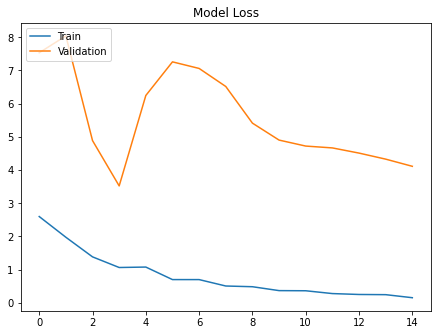

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

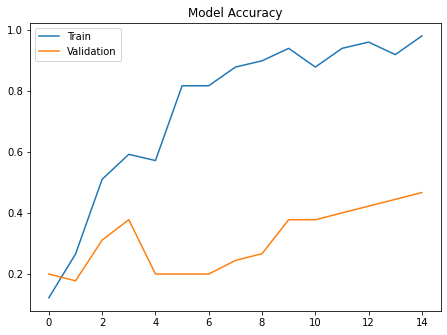

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

**Saving Model**

In [27]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)